In [2]:

%matplotlib inline
from hciplot import plot_frames, plot_cubes  # plotting routines
from matplotlib import pyplot as plt
from multiprocessing import cpu_count
import numpy as np
from packaging import version

In [3]:

import vip_hci as vip
vvip = vip.__version__
print("VIP version: ", vvip)
if version.parse(vvip) < version.parse("1.0.3"):
    msg = "Please upgrade your version of VIP"
    msg+= "It should be 1.0.3 or above to run this notebook."
    raise ValueError(msg)

VIP version:  1.6.0


In [10]:

from vip_hci.fits import open_fits
from astropy.utils.data import download_file

# alternatively, for local files simply provide their full or relative path. E.g.:
f1 = "C:/Users/bryce/Downloads/METIS_star_hopping/METIS_star_hopping/onaxis_PSF_L_CVC_with_bkg_smedian_z30d_Kmag8.5_v2.fits"
f2 = "C:/Users/bryce/Downloads/METIS_star_hopping/METIS_star_hopping/offaxis_PSF_L_CVC_with_bkg_sQ3_z30d_Kmag8.5_v2.fits"
#f3 = '../datasets/naco_betapic_derot_angles.fits'

cube = open_fits(f1)
psf = open_fits(f2)
angs = np.zeros(shape = 6000)

FITS HDU-0 data successfully loaded. Data shape: (6000, 293, 293)
FITS HDU-0 data successfully loaded. Data shape: (293, 293)


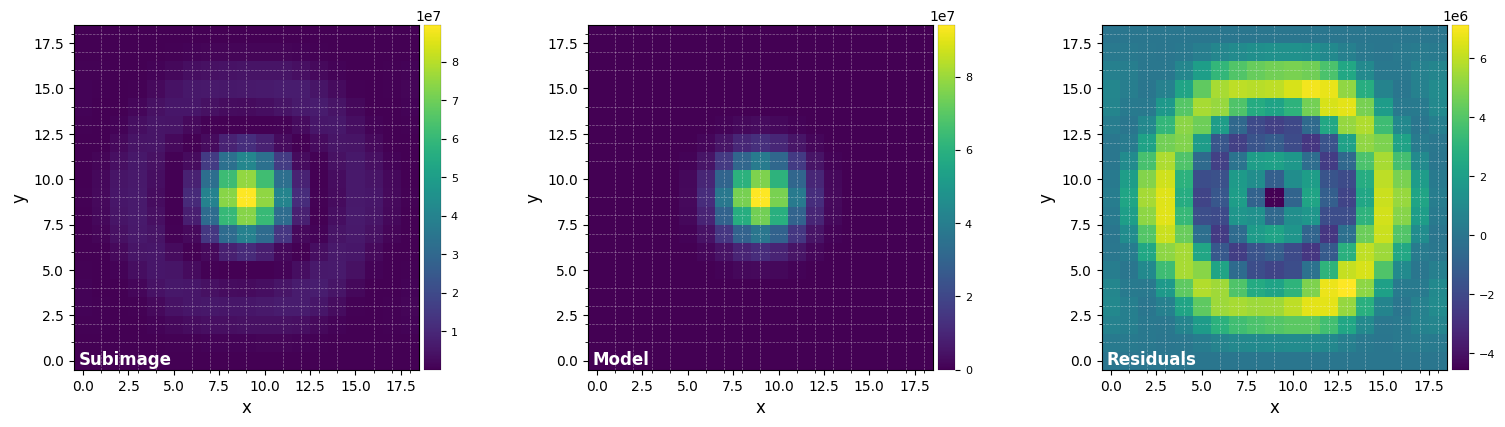

FWHM_y = 3.5005910157512905
FWHM_x = 3.4949576439253818 

centroid y = 9.028970055841148
centroid x = 9.00926627539722
centroid y subim = 9.028970055841148
centroid x subim = 9.00926627539722 

amplitude = 94212111.1613018
theta = 4.954443802703337

Mean FWHM: 3.498
Flux in 1xFWHM aperture: 640483653.378


In [11]:
%matplotlib inline
from vip_hci.fm import normalize_psf
psfn, flux, fwhm_naco = normalize_psf(psf, size=19, debug=True, full_output=True)

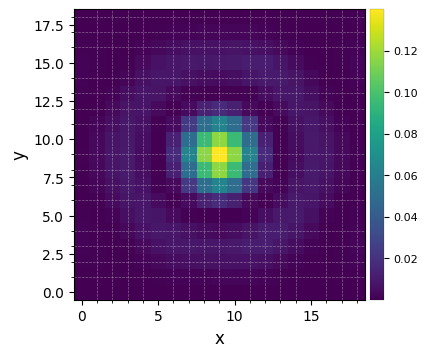

In [12]:
plot_frames(psfn, grid=True, size_factor=4)

In [42]:
from vip_hci.config.paramenum import SvdMode
SvdMode('cupy')

<SvdMode.CUPY: 'cupy'>

In [47]:
cube_ref = open_fits("C:/Users/bryce/Downloads/METIS_star_hopping/METIS_star_hopping/onaxis_PSF_L_CVC_with_bkg_smedian_z30d_Kmag8.5_v2.fits")
from vip_hci.preproc import cube_detect_badfr_correlation
from vip_hci.preproc.subsampling import cube_subsample
good_list = []
for frame in cube_subsample(cube,60):
    good_idx_p, bad_idx_p = cube_detect_badfr_correlation(cube_ref, frame_ref=frame, 
                                                        crop_size=31, dist='pearson', percentile=99, 
                                                        threshold=None, plot=False, verbose=False)
    good_list += list(good_idx_p)
good_list = list(dict.fromkeys(good_list))
print(good_list)

FITS HDU-0 data successfully loaded. Data shape: (6000, 293, 293)
Cube temporally subsampled by taking the mean of every 60 frames
New shape: (100, 293, 293)
[2, 3, 4, 8, 11, 12, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 36, 39, 43, 44, 45, 49, 56, 240, 531, 810, 1177, 1180, 1181, 1186, 1293, 1504, 1580, 1584, 2257, 2259, 2262, 2738, 2739, 3315, 3918, 3923, 3942, 4139, 4214, 4270, 4271, 4361, 4373, 4651, 4661, 5401, 5549, 5846, 5921, 73, 111, 375, 388, 506, 613, 618, 722, 738, 748, 915, 994, 1003, 1196, 1277, 1464, 1477, 1511, 1606, 1921, 1968, 1986, 2187, 2274, 2380, 2496, 2791, 3174, 3242, 3254, 3310, 3412, 3562, 3590, 3691, 3725, 3733, 3820, 3827, 4090, 4125, 4130, 4352, 4540, 4663, 4761, 4887, 5035, 5100, 5136, 5189, 5364, 5392, 5457, 5484, 5645, 5646, 5743, 5836, 5998, 179, 180, 630, 1092, 1127, 1224, 1247, 1248, 1400, 1438, 1560, 1589, 1609, 1657, 1708, 1753, 1851, 1922, 2080, 2093, 2213, 2300, 2325, 2475, 2485, 2588, 2592, 2886, 2971, 2981, 3358, 3735, 4016, 40

In [53]:
print(len(good_list))
cube_ref_trim = np.zeros(shape = (len(good_list), 293, 293))
for i in range(len(good_list)):
    cube_ref_trim[i] = cube_ref[good_list[i]]

1384


Cube temporally subsampled by taking the mean of every 60 frames
New shape: (100, 293, 293)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2024-07-10 19:07:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
System total memory = 33.413 GB
System available memory = 3.421 GB
Done vectorizing the frames. Matrix shape: (100, 85849)
Done vectorizing the frames. Matrix shape: (1384, 85849)
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:06.693542
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Done de-rotating and combining
Running time:  0:00:39.203080
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


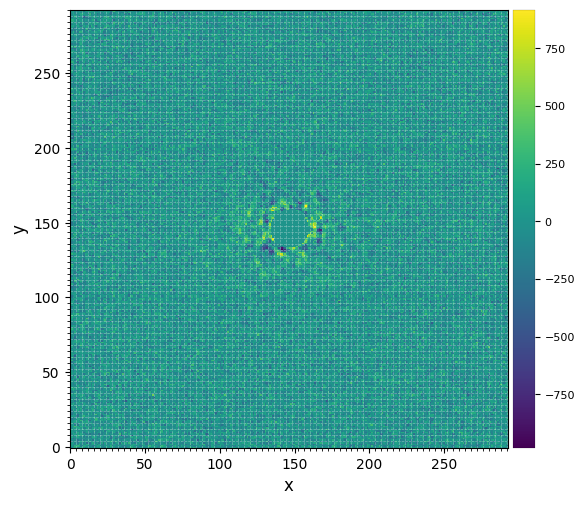

In [59]:
from vip_hci.psfsub import pca
from vip_hci.config.paramenum import SvdMode
SvdMode('cupy')
angs = np.zeros(shape = 100)
pca_rdi_fr = pca(cube_subsample(cube,60), angs, ncomp=42, cube_ref=cube_ref_trim)
from vip_hci.var import mask_circle
plot_frames(mask_circle(pca_rdi_fr, 13), grid=True)